
Exercise:

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1.Sepal Length

2.Sepal Width

3.Petal Length

4.Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1.Setosa

2.Versicolour

3.Virginica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



#iris = datasets.load_iris()
df=pd.read_csv("iris.csv")

In [2]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [4]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Average numbers for all columns
df.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


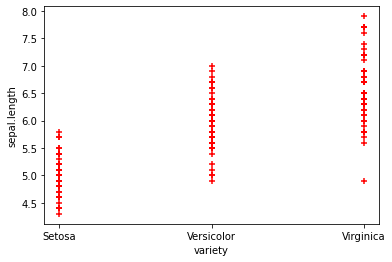

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('variety')
plt.ylabel("sepal.length")
plt.scatter(df["variety"],df["sepal.length"], color ='red', marker='+')

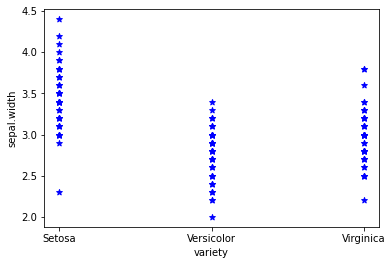

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('variety')
plt.ylabel("sepal.width")
plt.scatter(df["variety"],df["sepal.width"], color ='blue', marker='*')

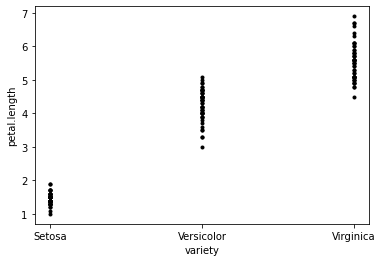

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('variety')
plt.ylabel("petal.length")
plt.scatter(df["variety"],df["petal.length"], color ='black', marker='.')

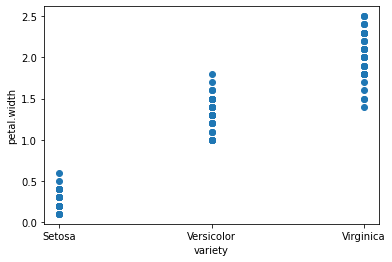

In [9]:
%matplotlib inline
plt.xlabel('variety')
plt.ylabel("petal.width")
plt.scatter(df["variety"],df["petal.width"])

In [10]:
#dumy columns
#dummies=pd.get_dummies(df.variety)
#dummies

# Lebel Encoder :Dummies method using sklearn.preprocessing import OneHotEncode

In [11]:
from sklearn.preprocessing import LabelEncoder
#Create Le object for LabelEncoder
le=LabelEncoder()
dfle=df
le.fit_transform(dfle.variety)
dfle.variety=le.fit_transform(dfle.variety)

dfle.reset_index(inplace=False)
dfle

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Train Test Split

In [12]:
#x=df.iloc[S_row:E_row, S_0:_E_31].values
X=df.iloc[:, 0:4].values # Features
y=df.iloc[:, 4].values #Target/label

In [13]:
#X
#y

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

classifier.fit(X_train, y_train)

C:\Users\rahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0,
       0, 2, 0, 1, 2, 2, 2, 1])

In [16]:
classifier.score(X_train,y_train)

0.9666666666666667

In [17]:
classifier.score(X_test,y_test)

1.0

# Pickle

In [18]:
import pickle
#Model save in file to write mode
with open('iris_pickle.sav','wb') as f:
    pickle.dump(classifier,f)

In [19]:
#read the file mode
with open('iris_pickle.sav','rb') as f:
    clfP=pickle.load(f)

# Predict from model

In [20]:
clfP.predict([[6.7,3.0,5.2,2.3]])

array([2])

# Confusion Matrix

In [21]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Accuracy is:{accuracy_score(y_pred,y_test)}")


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('F1 score is ',f1_score(y_test, y_pred, average='weighted'))    


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is:1.0
Precision Score :  1.0
Recall Score :  1.0
F1 score is  1.0


Text(69.0, 0.5, 'Truth')

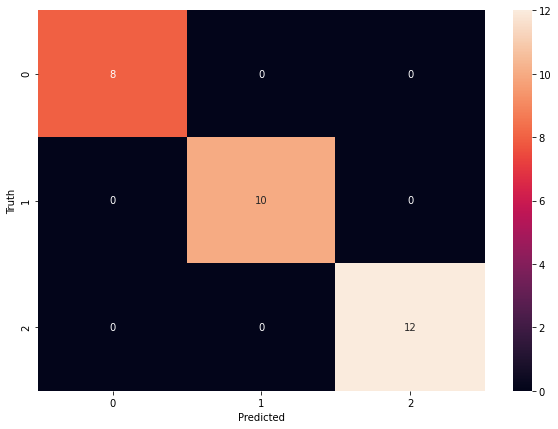

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')